In [5]:
import csv
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq

In [6]:
# csv reader (faster)
emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


# folderPath_hyq = os.path.abspath('./Dataset/new/hyqData/')
# folderPath_zjh = os.path.abspath('./Dataset/new/zjhData/')
folderPath_sgf = os.path.abspath('data/')

filePathList=[]
# filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
# filePathList.append(glob.glob(os.path.join(folderPath_zjh, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_sgf, "*.csv")))


for filePathListIndex in filePathList:
    csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
    dl=[]
    print('Reading .csv:')
    for f in filePathListIndex:
        csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
        # print(f[-5])

    print(len(csvData['d']))
    print(len(csvData['u']))
    print(len(csvData['l']))
    print(len(csvData['r']))
    print(len(csvData['f']))
    print('Separating EMG signal channels:')
    for currentAction in actionList:
        # print(currentAction)
        for row in range(len(csvData[currentAction])):
            emg_1_csv[currentAction].append(csvData[currentAction][row][0])
            emg_2_csv[currentAction].append(csvData[currentAction][row][1])
            emg_3_csv[currentAction].append(csvData[currentAction][row][2])



print('Lengths of each action: (down, up, left, right, and fist)')
print(len(emg_1_csv['d']))
print(len(emg_2_csv['d']))
print(len(emg_3_csv['d']))
print(len(emg_1_csv['u']))
print(len(emg_2_csv['u']))
print(len(emg_3_csv['u']))
print(len(emg_1_csv['l']))
print(len(emg_2_csv['l']))
print(len(emg_3_csv['l']))
print(len(emg_1_csv['r']))
print(len(emg_2_csv['r']))
print(len(emg_3_csv['r']))
print(len(emg_1_csv['f']))
print(len(emg_2_csv['f']))
print(len(emg_3_csv['f']))




Reading .csv:
16643
15948
16200
13500
16667
Separating EMG signal channels:
Lengths of each action: (down, up, left, right, and fist)
16643
16643
16643
15948
15948
15948
16200
16200
16200
13500
13500
13500
16667
16667
16667


Loading: d
56
56
56
Loading: u
54
54
54
Loading: l
54
54
54
Loading: r
45
45
45
Loading: f
56
56
56


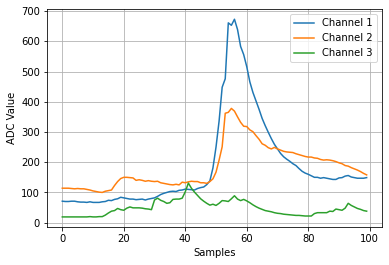

155
142
151
81
130


In [7]:

record_length=300
window_length=100
window_1=50
window_2=40
window_3=30

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

for actionIndex in range(len(actionList)):
    print('Loading: '+actionList[actionIndex])
  
    emg_1_slice = [emg_1_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),record_length)]
    emg_2_slice = [emg_2_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_2_csv[actionList[actionIndex]]),record_length)]
    emg_3_slice = [emg_3_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_3_csv[actionList[actionIndex]]),record_length)]

    print(len(emg_1_slice))
    print(len(emg_2_slice))
    print(len(emg_3_slice))
    

    generatedIndex=0
    for i in range(len(emg_1_slice)-1):
        max_1 = emg_1_slice[i].index(max(emg_1_slice[i]))
        max_2 = emg_2_slice[i].index(max(emg_2_slice[i]))
        max_3 = emg_3_slice[i].index(max(emg_3_slice[i]))
        avgMax=int((max_1+max_2+max_3)/3)
        
        if max_1>window_1 and max_1<record_length-window_1 and max_2>window_1 and max_2<record_length-window_1 and max_3>window_1 and max_3<record_length-window_1:
            
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            generatedIndex+=1
        if max_1>window_2 and max_1<record_length-window_2 and max_2>window_2 and max_2<record_length-window_2 and max_3>window_2 and max_3<record_length-window_2:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            generatedIndex+=1
        if max_1>window_3 and max_1<record_length-window_3 and max_2>window_3 and max_2<record_length-window_3 and max_3>window_3 and max_3<record_length-window_3:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            generatedIndex+=1

            
plt.plot(emg_1_window['d'][0])
plt.plot(emg_2_window['d'][0])
plt.plot(emg_3_window['d'][0])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.grid()
plt.show()

print(len(emg_1_window['d']))
print(len(emg_1_window['u']))
print(len(emg_1_window['l']))
print(len(emg_1_window['r']))
print(len(emg_1_window['f']))

In [8]:
# feature extraction

featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
    emg_1=[]
    emg_2=[]
    emg_3=[]
    print(actionList[actionIndex])
    for row in range(len(emg_1_window[actionList[actionIndex]])):
        emg_1=emg_1_window[actionList[actionIndex]][row]
        emg_2=emg_2_window[actionList[actionIndex]][row]
        emg_3=emg_3_window[actionList[actionIndex]][row]
        
        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0

        # some temporary variables

        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0

        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0

        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1

            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
        
#         print('check')
#         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                             rms_emg_1, rms_emg_2, rms_emg_3]
        featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]




print('Loading completed')

d


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


u
l
r
f
Loading completed


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 81, using nperseg = 81
  .format(nperseg, input_length))


In [9]:
# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)


x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'l': 1,
        'r': 2,
        'u': 3,
        'd': 4,
        'f': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
# y_val_array = np.array(y_val).reshape(dictLength,1)
y_val_array = np.array(y_val)
x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)

TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

# print(x_train.shape)
# print(y_train_class.shape)
# print(x_validate.shape)
# print(y_validate_class.shape)
# print(x_test.shape)
# print(y_test_class.shape)

In [59]:
print(y_test[20])
print(y_test_class[20])

2
[0. 0. 1. 0. 0. 0.]


In [46]:
from sklearn.svm import SVC
clf = SVC(C=100,kernel='rbf',gamma=0.1)
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Test which kernel is the best:

In [42]:
from sklearn.model_selection import GridSearchCV  
grid = GridSearchCV(SVC(), param_grid={"kernel" : ['linear', 'rbf', 'poly']}, cv=4)  
grid.fit(x_train, y_train)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'kernel': 'poly'} with a score of 0.69


In [56]:
from sklearn.svm import SVC
clf = SVC(kernel='poly',degree=9)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Choose degree for poly kernel:

In [55]:
from sklearn.model_selection import GridSearchCV  
grid = GridSearchCV(SVC(kernel='poly'), param_grid={"degree":[0, 1, 2, 3, 4, 5, 6, 7, 8 ,9]}, cv=4)  
grid.fit(x_train, y_train)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'degree': 9} with a score of 0.84


Choose C and gamma for rbf kernel

In [45]:
from sklearn.model_selection import GridSearchCV  
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 5, 10, 50,100], "gamma":[1,0.5, 0.1, 0.01]}, cv=10)  
grid.fit(x_train, y_train)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'gamma': 1} with a score of 0.83


In [59]:
print('Train acc:'+str(clf.score(x_train, y_train))) 
print('Test acc:'+str(clf.score(x_test, y_test)))
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train acc:0.9493670886075949
Test acc:0.8702290076335878
[[34  0  0  0  0]
 [ 2  5  0  5  0]
 [ 0  0 21  1  1]
 [ 0  0  1 30  2]
 [ 2  1  1  1 24]]
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        34
           2       0.83      0.42      0.56        12
           3       0.91      0.91      0.91        23
           4       0.81      0.91      0.86        33
           5       0.89      0.83      0.86        29

    accuracy                           0.87       131
   macro avg       0.87      0.81      0.83       131
weighted avg       0.87      0.87      0.86       131

